# Assignment 1

## Setup

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from consav.linear_interp import interp_2d

# load local model file and initialize model class
from A1 import DynLaborFertModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Q1
I first initialise the baseline model. Then I run the method .structural_estimation(). Which loops over an array of guesses for $\beta_1$. For each instance it solves the model, simulates it, and calculates the difference in average hours worked in the year where childbirth takes place compared to a year before subtracted by -10%. I then find the value of $\beta_1$ where the difference is minimised, which in this case is where $\beta_1 = 0.03$.

In [5]:
model_np = DynLaborFertModelClass(par={'y_cons':0,'y_growth':0,'theta':0,'p_spouse':1})
model_np.structural_estimation()
model_np.par.beta_1=0.03

0.0
0.01
0.03
0.04
0.06
0.07
0.09
0.1


In [17]:
print(model_np.sim.beta_1_grid,model_np.sim.distance_grid)

[0.   0.01 0.03 0.04 0.06 0.07 0.09 0.1 ] [1.13287066e-02 4.64976379e-03 3.61805922e-07 8.11099792e-04
 6.43371829e-03 1.06973841e-02 2.14624723e-02 2.72939293e-02]


### Q2
I calculate the Marshall elasticity with and without a spouse who contributes with income. I find that in the baseline model, without an income earning spouse, the simulated Marshall elasticity is -0.233%. With an income earning spouse it is -0.205%.

In [18]:
model_np = DynLaborFertModelClass(par={'y_cons':0,'y_growth':0,'theta':0,'p_spouse':1})
model_np.solve()
model_np.simulate()

# simulate 1 pct incr in wages in baseline model without partner
model_np_1pct = model_np.copy()
model_np_1pct.par.w_vec[:] = model_np_1pct.par.w_vec[:]*1.01
model_np_1pct.solve()
model_np_1pct.simulate()

#Calculate Marshall elasticity in the first period without partner
ela_M_np = (model_np_1pct.sim.h - model_np.sim.h)/model_np.sim.h*100

#Simulate baseline model with partner
model_p = DynLaborFertModelClass(par={'theta':0,'p_spouse':1})
model_p.solve()
model_p.simulate()

#Simulate 1 pct inc in wages in baseline model with partner
model_p_1pct = model_p.copy()
model_p_1pct.par.w_vec[:] = model_p_1pct.par.w_vec[:]*1.01
model_p_1pct.solve()
model_p_1pct.simulate()

#Calculate Marshall elasticity in the first period with partner
ela_M_p = (model_p_1pct.sim.h - model_p.sim.h)/model_p.sim.h*100

print(f'Simulated elasticity, baseline: {ela_M_np[0,0]:2.3f} \n Simulated elasticity, baseline with income earning spouse: {ela_M_p[0,0]:2.3f} \n difference: {ela_M_np[0,0]-ela_M_p[0,0]:2.3f}')

Simulated elasticity, baseline: -0.223 
 Simulated elasticity, baseline with income earning spouse: -0.205 
 difference: -0.018


I plot consumption, assets, hours worked and the fraction with children over the life cycle in the model with an income earning vs. the baseline.

C:\Users\krist\AppData\Local\Temp\ipykernel_20556\1610280912.py:27: RuntimeWarning: invalid value encountered in divide
  second_axis=income_earning_values / baseline_values


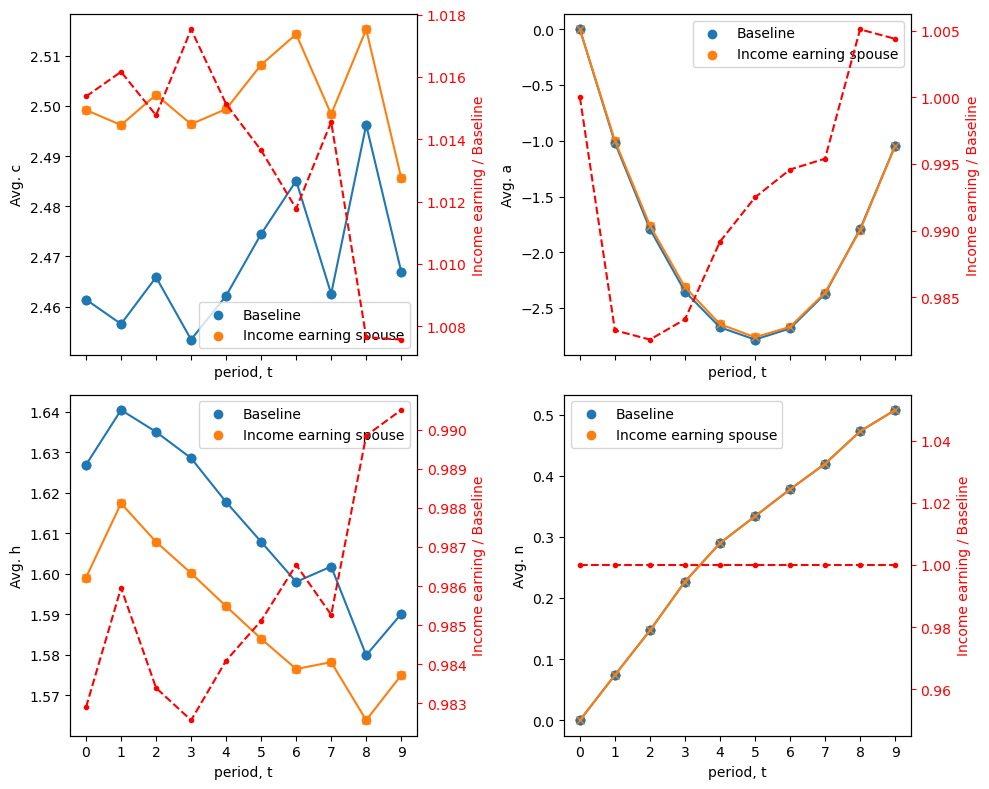

In [22]:
# Variables to compare
variables = ('c', 'a', 'h', 'n')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

# Plotting behavior for each variable
for idx, var in enumerate(variables):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    # Plotting for model_np
    baseline_values = np.mean(getattr(model_np.sim, var), axis=0)
    ax.scatter(range(model_np.par.simT), baseline_values, label='Baseline')
    ax.plot(range(model_np.par.simT), baseline_values, linestyle='-', marker='o')

    # Plotting for model_p
    income_earning_values = np.mean(getattr(model_p.sim, var), axis=0)
    ax.scatter(range(model_p.par.simT), income_earning_values, label='Income earning spouse')
    ax.plot(range(model_p.par.simT), income_earning_values, linestyle='-', marker='x')

    ax.set(xlabel='period, t', ylabel=f'Avg. {var}', xticks=range(model_np.par.simT))
    ax.legend()

    # Add a second y-axis on the right side
    ax2 = ax.twinx()
    #Force values to 1 when getting 0/0 error.
    second_axis=income_earning_values / baseline_values
    if idx==1 or idx==3:
        second_axis[0]=1
    ax2.plot(range(model_p.par.simT), second_axis, color='red', linestyle='--', marker='.')
    ax2.set_ylabel('Income earning / Baseline', color='red')
    ax2.tick_params('y', colors='red')

plt.tight_layout()

plt.show()

### Q3:
I calculate the marshall elasticity again, but now I do it in the case where there is an income earning spouse and a childcare cost ($\theta=0.05$). I find that the "reform" or increase in childcare cost leads to a numerically larger marshall elasticity of -0.207%.

In [24]:

#Simulate baseline model with partner
model_p_no_sub = DynLaborFertModelClass(par={'p_spouse':1})
model_p_no_sub.solve()
model_p_no_sub.simulate()

#Simulate 1 pct inc in wages in baseline model with partner
model_p_no_sub_1pct = model_p_no_sub.copy()
model_p_no_sub_1pct.par.w_vec[:] = model_p_no_sub_1pct.par.w_vec[:]*1.01
model_p_no_sub_1pct.solve()
model_p_no_sub_1pct.simulate()

#Calculate Marshall elasticity in the first period with partner
ela_M_p_no_sub = (model_p_no_sub_1pct.sim.h - model_p_no_sub.sim.h)/model_p_no_sub.sim.h*100

print(f'Simulated elasticity, baseline: {ela_M_np[0,0]:2.3f} \n Simulated elasticity, with income earning spouse and with a childcare cost: {ela_M_p_no_sub[0,0]:2.3f} \n difference: {ela_M_np[0,0]-ela_M_p_no_sub[0,0]:2.3f}')

Simulated elasticity, baseline: -0.223 
 Simulated elasticity, with income earning spouse and with a childcare cost: -0.207 
 difference: -0.016


I plot consumption, assets, hours worked and the fraction with children over the life cycle in the model with an income earning spouse and with a childcare cost vs. the baseline.

C:\Users\krist\AppData\Local\Temp\ipykernel_20556\2859543832.py:28: RuntimeWarning: invalid value encountered in divide
  second_axis=income_earning_values / baseline_values


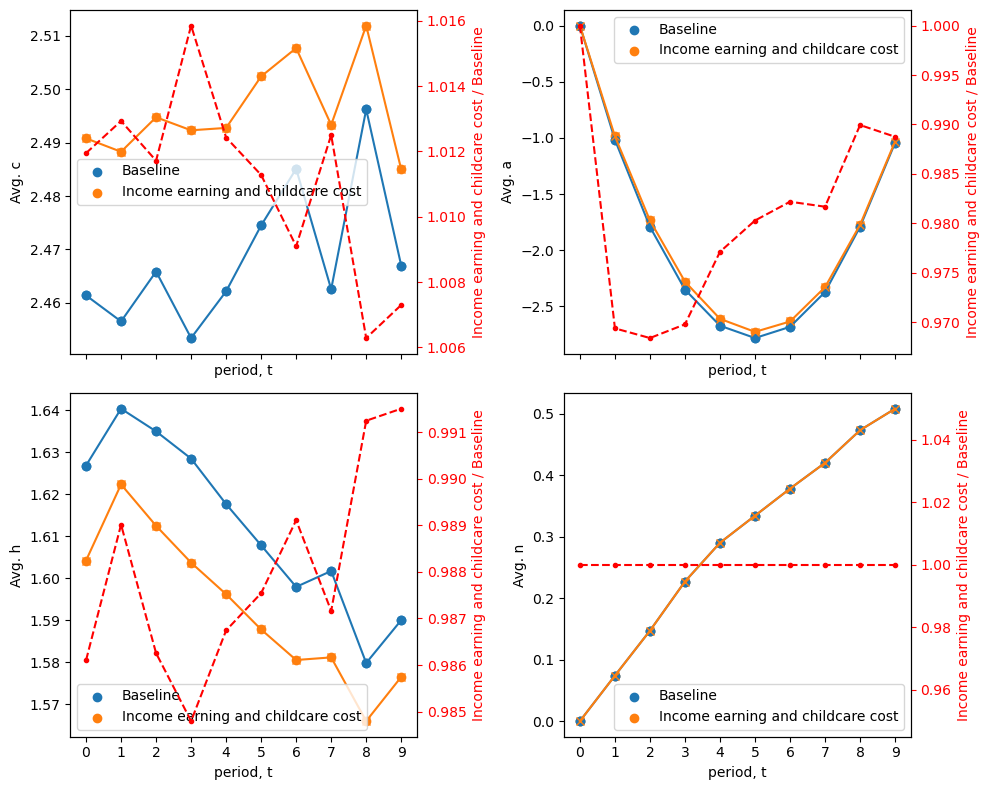

In [27]:
# Variables to compare
variables = ('c', 'a', 'h', 'n')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

# Plotting behavior for each variable
for idx, var in enumerate(variables):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    # Plotting for model_np
    baseline_values = np.mean(getattr(model_np.sim, var), axis=0)
    ax.scatter(range(model_np.par.simT), baseline_values, label='Baseline')
    ax.plot(range(model_np.par.simT), baseline_values, linestyle='-', marker='o')

    # Plotting for model_p_no_sub
    income_earning_values = np.mean(getattr(model_p_no_sub.sim, var), axis=0)
    ax.scatter(range(model_p_no_sub.par.simT), income_earning_values, label='Income earning and childcare cost')
    ax.plot(range(model_p_no_sub.par.simT), income_earning_values, linestyle='-', marker='x')

    ax.set(xlabel='period, t', ylabel=f'Avg. {var}', xticks=range(model_np.par.simT))
    ax.legend()

    # Add a second y-axis on the right side
    ax2 = ax.twinx()
    #Force values to 1 when getting 0/0 error.
    second_axis=income_earning_values / baseline_values
    if idx==1 or idx==3:
        second_axis[0]=1
    ax2.plot(range(model_p.par.simT), second_axis, color='red', linestyle='--', marker='.')
    ax2.set_ylabel('Income earning and childcare cost / Baseline', color='red')
    ax2.tick_params('y', colors='red')

plt.tight_layout()

plt.show()

### Q5
Lastly, I model the appearance of a spouse as stochastic with a probability $p_s=0.8$ of being equal to 1, and a probability of $1-p_s$ of being 0. I find that the Marshall elasticity increases numerically to -0.209%.

In [28]:

#Simulate baseline model with partner
model_sto_p_no_sub = DynLaborFertModelClass()
model_sto_p_no_sub.solve()
model_sto_p_no_sub.simulate()

#Simulate 1 pct inc in wages in baseline model with partner
model_sto_p_no_sub_1pct = model_sto_p_no_sub.copy()
model_sto_p_no_sub_1pct.par.w_vec[:] = model_sto_p_no_sub_1pct.par.w_vec[:]*1.01
model_sto_p_no_sub_1pct.solve()
model_sto_p_no_sub_1pct.simulate()

#Calculate Marshall elasticity in the first period with partner
ela_M_sto_p_no_sub = (model_sto_p_no_sub_1pct.sim.h - model_sto_p_no_sub.sim.h)/model_sto_p_no_sub.sim.h*100

print(f'Simulated elasticity, baseline: {ela_M_np[0,0]:2.3f} \n Simulated elasticity, with income earning spouse being stochastic and with a childcare cost: {ela_M_sto_p_no_sub[0,0]:2.3f} \n difference: {ela_M_np[0,0]-ela_M_sto_p_no_sub[0,0]:2.3f}')

Simulated elasticity, baseline: -0.223 
 Simulated elasticity, with income earning spouse being stochastic and with a childcare cost: -0.209 
 difference: -0.014


I plot consumption, assets, hours worked and the fraction with children over the life cycle in the model with an income earning spouse being stochastic and with a childcare cost vs. the baseline.

C:\Users\krist\AppData\Local\Temp\ipykernel_20556\786308850.py:28: RuntimeWarning: invalid value encountered in divide
  second_axis=income_earning_values / baseline_values


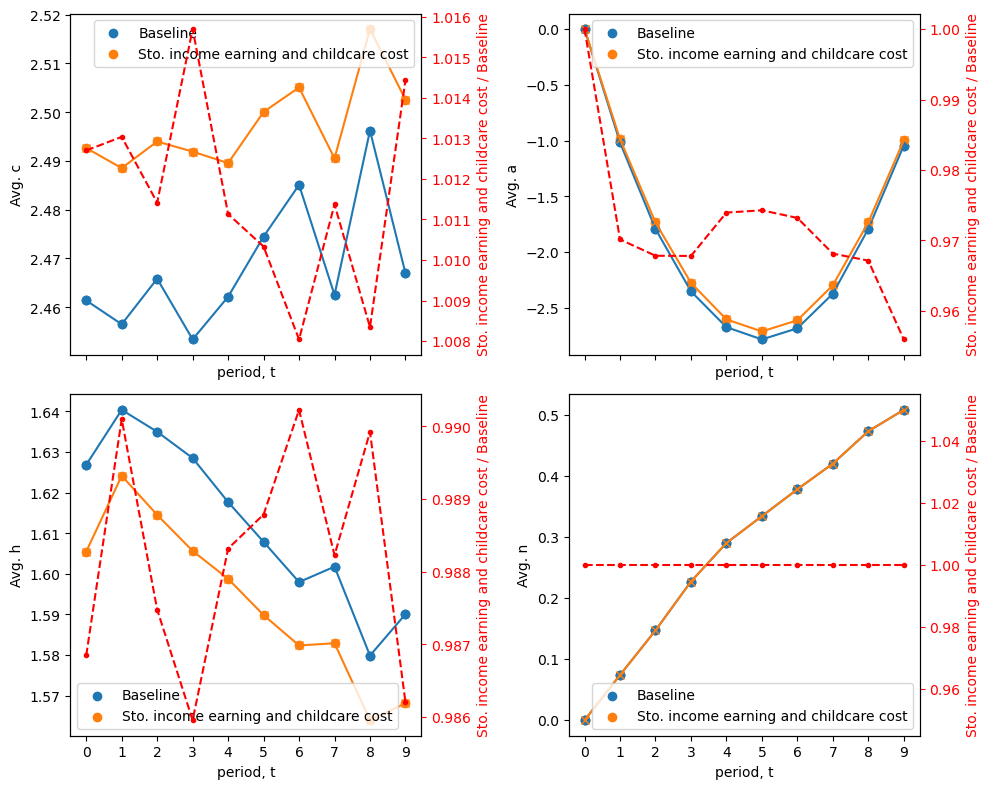

In [29]:
# Variables to compare
variables = ('c', 'a', 'h', 'n')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

# Plotting behavior for each variable
for idx, var in enumerate(variables):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    # Plotting for model_np
    baseline_values = np.mean(getattr(model_np.sim, var), axis=0)
    ax.scatter(range(model_np.par.simT), baseline_values, label='Baseline')
    ax.plot(range(model_np.par.simT), baseline_values, linestyle='-', marker='o')

    # Plotting for model_p_no_sub
    income_earning_values = np.mean(getattr(model_sto_p_no_sub.sim, var), axis=0)
    ax.scatter(range(model_sto_p_no_sub.par.simT), income_earning_values, label='Sto. income earning and childcare cost')
    ax.plot(range(model_sto_p_no_sub.par.simT), income_earning_values, linestyle='-', marker='x')

    ax.set(xlabel='period, t', ylabel=f'Avg. {var}', xticks=range(model_np.par.simT))
    ax.legend()

    # Add a second y-axis on the right side
    ax2 = ax.twinx()
    #Force values to 1 when getting 0/0 error.
    second_axis=income_earning_values / baseline_values
    if idx==1 or idx==3:
        second_axis[0]=1
    ax2.plot(range(model_p.par.simT), second_axis, color='red', linestyle='--', marker='.')
    ax2.set_ylabel('Sto. income earning and childcare cost / Baseline', color='red')
    ax2.tick_params('y', colors='red')

plt.tight_layout()

plt.show()